In [79]:
library(modelr)
library(tidyverse)

### 갭마인더 (gapminder)

In [80]:
library(gapminder)

In [81]:
gapminder %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


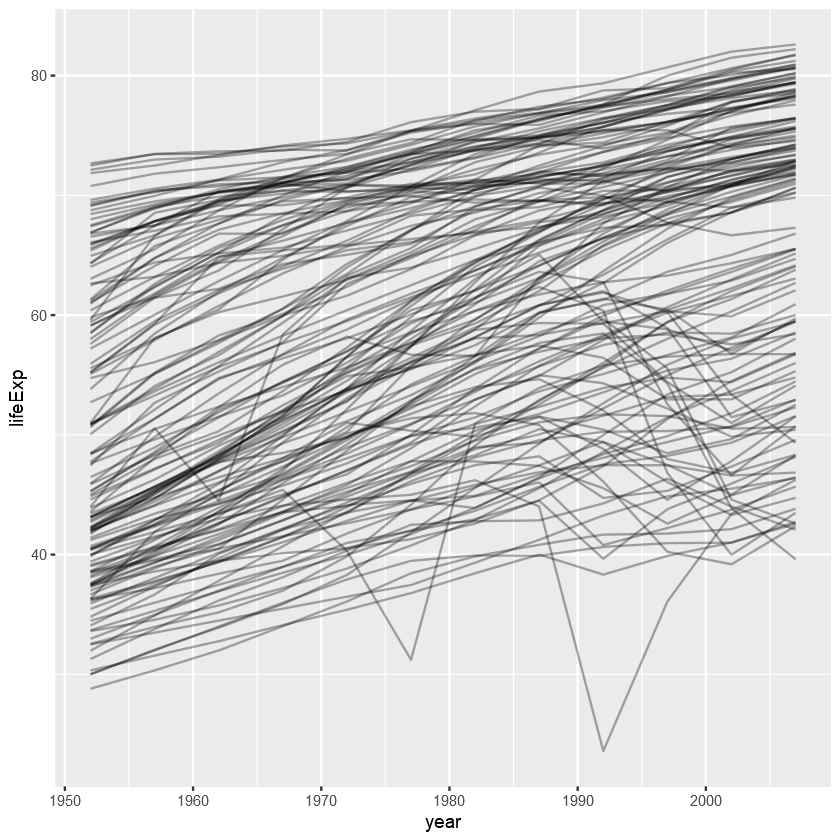

In [82]:
gapminder %>% 
    ggplot(aes(x = year, y = lifeExp, group = country)) + 
    geom_line(alpha = 1/3)

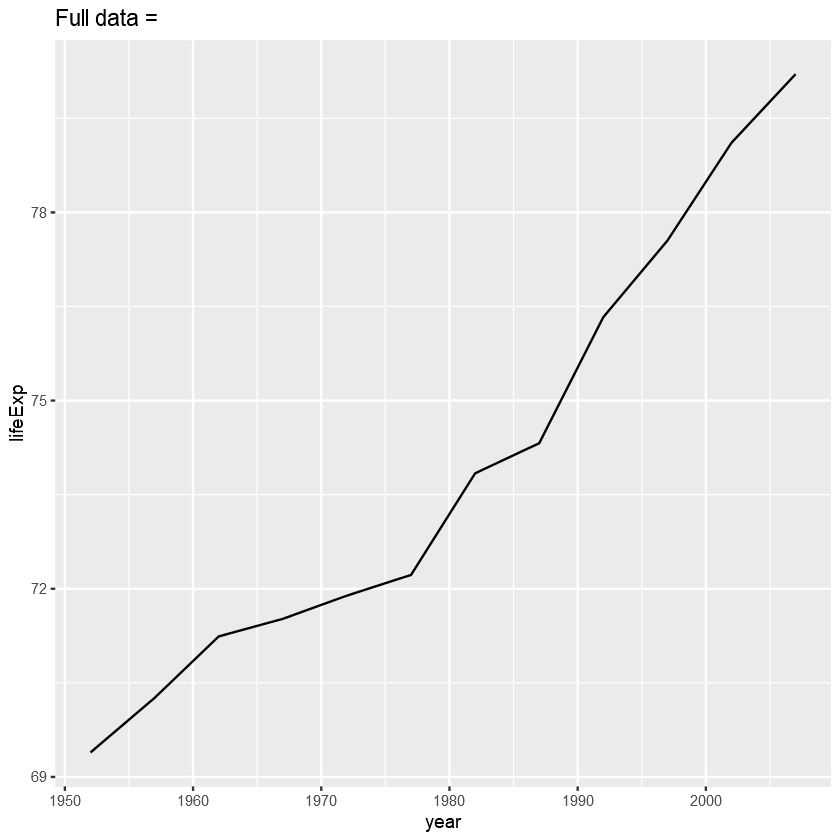

In [83]:
nz <- gapminder %>% filter(country == "New Zealand")
nz %>% ggplot(aes(year, lifeExp)) + 
    geom_line() + 
    ggtitle("Full data = ")

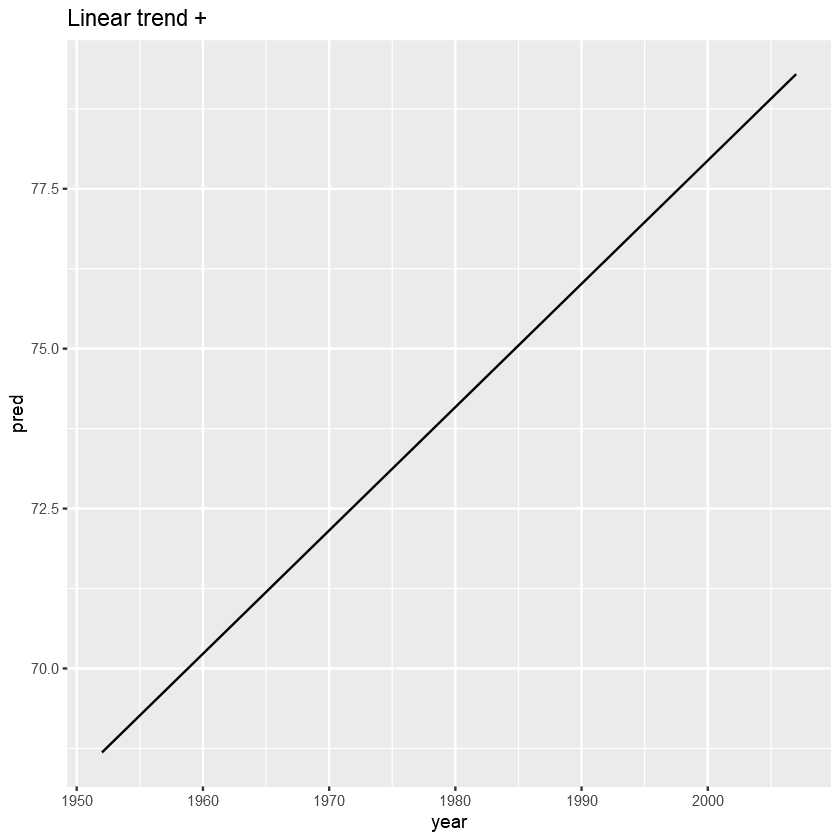

In [84]:
nz_mod <- lm(lifeExp ~ year, nz)
nz %>% add_predictions(nz_mod) %>%
    ggplot(aes(year, pred)) + 
    geom_line() + 
    ggtitle("Linear trend + ")

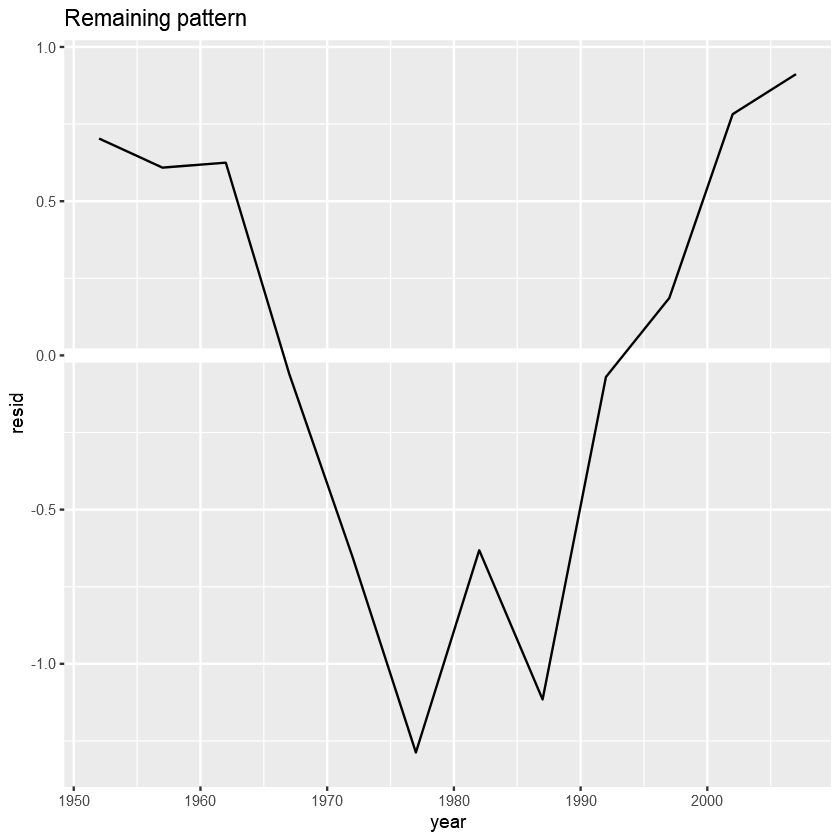

In [85]:
nz %>% 
    add_residuals(nz_mod) %>%
    ggplot(aes(year, resid)) + 
    geom_hline(yintercept = 0, color = "white", size = 3) + 
    geom_line() + 
    ggtitle("Remaining pattern")

### 중첩된 데이터
### nest() : 데이터프레임을 중첩된 데이터프레임으로 변경

In [86]:
by_country <- gapminder %>%
    group_by(country, continent) %>%
    nest()
by_country %>% print

# A tibble: 142 x 3
# Groups:   country, continent [142]
   country     continent data             
   <fct>       <fct>     <list>           
 1 Afghanistan Asia      <tibble [12 x 4]>
 2 Albania     Europe    <tibble [12 x 4]>
 3 Algeria     Africa    <tibble [12 x 4]>
 4 Angola      Africa    <tibble [12 x 4]>
 5 Argentina   Americas  <tibble [12 x 4]>
 6 Australia   Oceania   <tibble [12 x 4]>
 7 Austria     Europe    <tibble [12 x 4]>
 8 Bahrain     Asia      <tibble [12 x 4]>
 9 Bangladesh  Asia      <tibble [12 x 4]>
10 Belgium     Europe    <tibble [12 x 4]>
# ... with 132 more rows


#### 그룹별로 하나의 행과 다소 특이한 열을 가진 데이터프레임인 data가 생성

In [87]:
by_country$data[[1]]

year,lifeExp,pop,gdpPercap
<int>,<dbl>,<int>,<dbl>
1952,28.801,8425333,779.4453
1957,30.332,9240934,820.8530
1962,31.997,10267083,853.1007
1967,34.020,11537966,836.1971
1972,36.088,13079460,739.9811
1977,38.438,14880372,786.1134
1982,39.854,12881816,978.0114
1987,40.822,13867957,852.3959
1992,41.674,16317921,649.3414


### 리스트-열

In [88]:
country_model <- function(df) {
    lm(lifeExp ~ year, df)
}

In [89]:
by_country <- by_country %>%
    mutate(model = map(data, country_model))
by_country %>% print
by_country$model[1]

# A tibble: 142 x 4
# Groups:   country, continent [142]
   country     continent data              model 
   <fct>       <fct>     <list>            <list>
 1 Afghanistan Asia      <tibble [12 x 4]> <lm>  
 2 Albania     Europe    <tibble [12 x 4]> <lm>  
 3 Algeria     Africa    <tibble [12 x 4]> <lm>  
 4 Angola      Africa    <tibble [12 x 4]> <lm>  
 5 Argentina   Americas  <tibble [12 x 4]> <lm>  
 6 Australia   Oceania   <tibble [12 x 4]> <lm>  
 7 Austria     Europe    <tibble [12 x 4]> <lm>  
 8 Bahrain     Asia      <tibble [12 x 4]> <lm>  
 9 Bangladesh  Asia      <tibble [12 x 4]> <lm>  
10 Belgium     Europe    <tibble [12 x 4]> <lm>  
# ... with 132 more rows


[[1]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -507.5343       0.2753  



In [90]:
by_country %>% 
    filter(continent == "Europe") %>% print

# A tibble: 30 x 4
# Groups:   country, continent [30]
   country                continent data              model 
   <fct>                  <fct>     <list>            <list>
 1 Albania                Europe    <tibble [12 x 4]> <lm>  
 2 Austria                Europe    <tibble [12 x 4]> <lm>  
 3 Belgium                Europe    <tibble [12 x 4]> <lm>  
 4 Bosnia and Herzegovina Europe    <tibble [12 x 4]> <lm>  
 5 Bulgaria               Europe    <tibble [12 x 4]> <lm>  
 6 Croatia                Europe    <tibble [12 x 4]> <lm>  
 7 Czech Republic         Europe    <tibble [12 x 4]> <lm>  
 8 Denmark                Europe    <tibble [12 x 4]> <lm>  
 9 Finland                Europe    <tibble [12 x 4]> <lm>  
10 France                 Europe    <tibble [12 x 4]> <lm>  
# ... with 20 more rows


In [91]:
by_country %>%
    arrange(continent, country) %>% print

# A tibble: 142 x 4
# Groups:   country, continent [142]
   country                  continent data              model 
   <fct>                    <fct>     <list>            <list>
 1 Algeria                  Africa    <tibble [12 x 4]> <lm>  
 2 Angola                   Africa    <tibble [12 x 4]> <lm>  
 3 Benin                    Africa    <tibble [12 x 4]> <lm>  
 4 Botswana                 Africa    <tibble [12 x 4]> <lm>  
 5 Burkina Faso             Africa    <tibble [12 x 4]> <lm>  
 6 Burundi                  Africa    <tibble [12 x 4]> <lm>  
 7 Cameroon                 Africa    <tibble [12 x 4]> <lm>  
 8 Central African Republic Africa    <tibble [12 x 4]> <lm>  
 9 Chad                     Africa    <tibble [12 x 4]> <lm>  
10 Comoros                  Africa    <tibble [12 x 4]> <lm>  
# ... with 132 more rows


### 중첩 해제하기 (Unnesting)

In [92]:
by_country <- by_country %>%
    mutate(
        resids = map2(data, model, add_residuals)
    )
by_country %>% print

# A tibble: 142 x 5
# Groups:   country, continent [142]
   country     continent data              model  resids           
   <fct>       <fct>     <list>            <list> <list>           
 1 Afghanistan Asia      <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 2 Albania     Europe    <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 3 Algeria     Africa    <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 4 Angola      Africa    <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 5 Argentina   Americas  <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 6 Australia   Oceania   <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 7 Austria     Europe    <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 8 Bahrain     Asia      <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 9 Bangladesh  Asia      <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
10 Belgium     Europe    <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
# ... with 132 more rows


### unnest() : 중첩된 데이터프레임을 일반 데이터프레임으로 변경
- .drop = TRUE : 여전히 모든 리스트-열을 포함하고 있을 때, 숨기기 위해서 사용

In [93]:
resids <- unnest(by_country, resids)
resids %>% print

# A tibble: 1,704 x 9
# Groups:   country, continent [142]
   country     continent data     model   year lifeExp     pop gdpPercap   resid
   <fct>       <fct>     <list>   <list> <int>   <dbl>   <int>     <dbl>   <dbl>
 1 Afghanistan Asia      <tibble> <lm>    1952    28.8  8.43e6      779. -1.11  
 2 Afghanistan Asia      <tibble> <lm>    1957    30.3  9.24e6      821. -0.952 
 3 Afghanistan Asia      <tibble> <lm>    1962    32.0  1.03e7      853. -0.664 
 4 Afghanistan Asia      <tibble> <lm>    1967    34.0  1.15e7      836. -0.0172
 5 Afghanistan Asia      <tibble> <lm>    1972    36.1  1.31e7      740.  0.674 
 6 Afghanistan Asia      <tibble> <lm>    1977    38.4  1.49e7      786.  1.65  
 7 Afghanistan Asia      <tibble> <lm>    1982    39.9  1.29e7      978.  1.69  
 8 Afghanistan Asia      <tibble> <lm>    1987    40.8  1.39e7      852.  1.28  
 9 Afghanistan Asia      <tibble> <lm>    1992    41.7  1.63e7      649.  0.754 
10 Afghanistan Asia      <tibble> <lm>    1997    

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



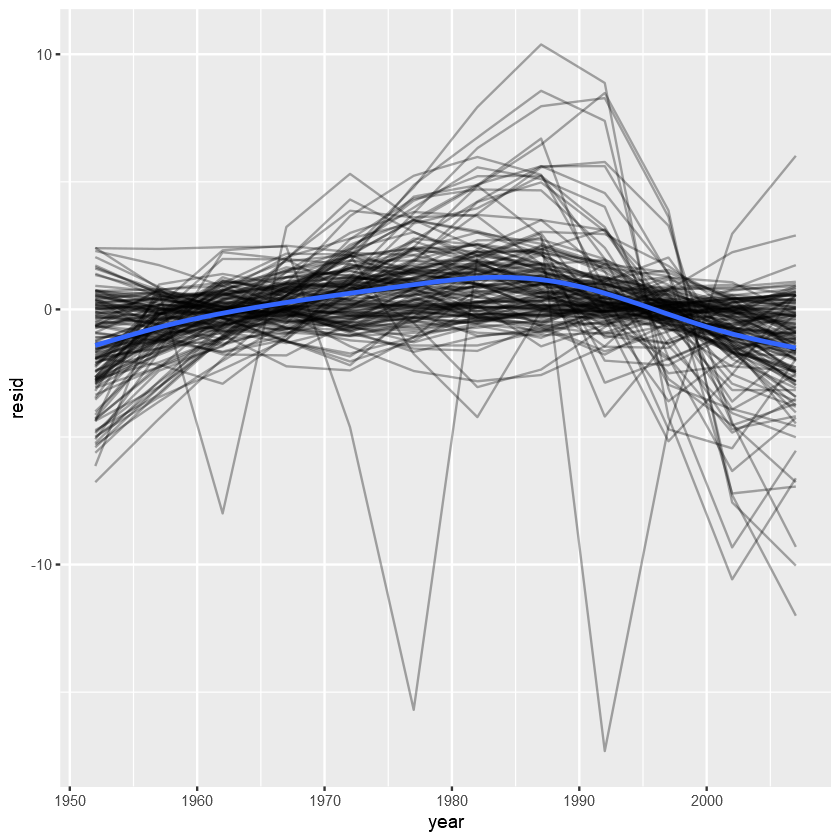

In [94]:
resids %>%
    ggplot(aes(x = year, y = resid)) + 
    geom_line(aes(group = country), alpha = 1/3) + 
    geom_smooth(se = F)

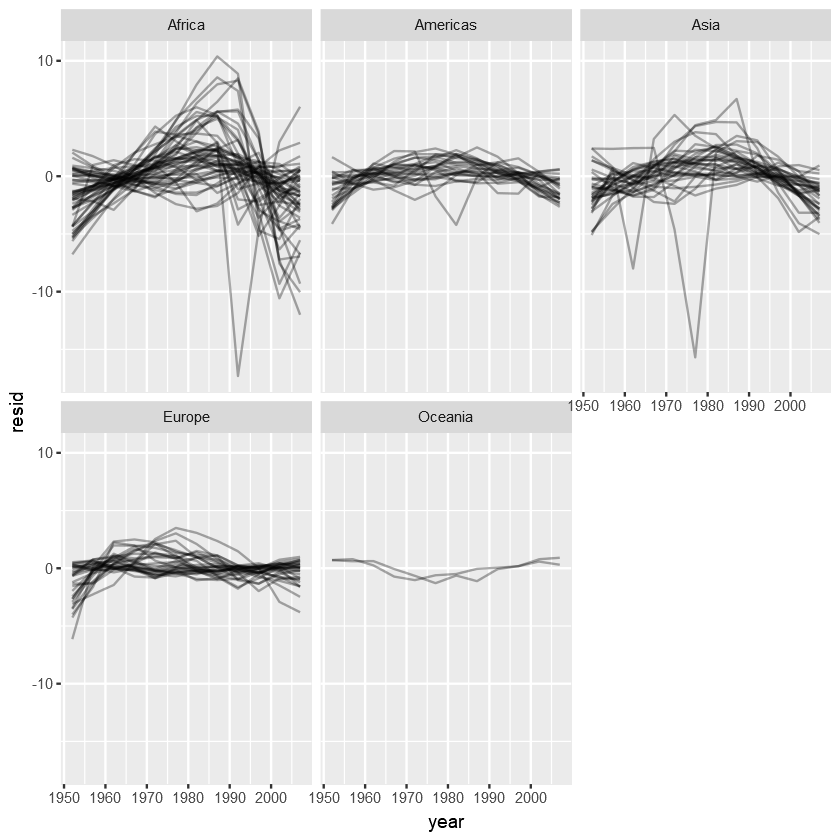

In [95]:
resids %>%
    ggplot(aes(x = year, y = resid)) + 
    geom_line(aes(group = country), alpha = 1/3) + 
    facet_wrap(~ continent)

#### 아프리카 대륙의 그래프에서 매우 큰 잔차값 관측 가능
#### 모델이 잘 맞지 않는 다는 근거

### 모델의 성능
### glance() : 모델의 성능 메트릭 추출

In [96]:
library(broom)

In [97]:
glance(nz_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9535846,0.9489431,0.8043472,205.4459,5.407324e-08,1,-13.32064,32.64128,34.096,6.469743,10,12


In [104]:
glance <- by_country %>% 
  mutate(glance = map(model, broom::glance)) %>% 
  unnest(glance, .drop = TRUE) %>% print

# A tibble: 142 x 17
# Groups:   country, continent [142]
   country     continent data     model  resids   r.squared adj.r.squared sigma
   <fct>       <fct>     <list>   <list> <list>       <dbl>         <dbl> <dbl>
 1 Afghanistan Asia      <tibble> <lm>   <tibble>     0.948         0.942 1.22 
 2 Albania     Europe    <tibble> <lm>   <tibble>     0.911         0.902 1.98 
 3 Algeria     Africa    <tibble> <lm>   <tibble>     0.985         0.984 1.32 
 4 Angola      Africa    <tibble> <lm>   <tibble>     0.888         0.877 1.41 
 5 Argentina   Americas  <tibble> <lm>   <tibble>     0.996         0.995 0.292
 6 Australia   Oceania   <tibble> <lm>   <tibble>     0.980         0.978 0.621
 7 Austria     Europe    <tibble> <lm>   <tibble>     0.992         0.991 0.407
 8 Bahrain     Asia      <tibble> <lm>   <tibble>     0.967         0.963 1.64 
 9 Bangladesh  Asia      <tibble> <lm>   <tibble>     0.989         0.988 0.977
10 Belgium     Europe    <tibble> <lm>   <tibble>     0.995   

In [107]:
glance %>% 
    arrange(r.squared) %>% print

# A tibble: 142 x 17
# Groups:   country, continent [142]
   country       continent data     model resids   r.squared adj.r.squared sigma
   <fct>         <fct>     <list>   <lis> <list>       <dbl>         <dbl> <dbl>
 1 Rwanda        Africa    <tibble> <lm>  <tibble>    0.0172      -0.0811   6.56
 2 Botswana      Africa    <tibble> <lm>  <tibble>    0.0340      -0.0626   6.11
 3 Zimbabwe      Africa    <tibble> <lm>  <tibble>    0.0562      -0.0381   7.21
 4 Zambia        Africa    <tibble> <lm>  <tibble>    0.0598      -0.0342   4.53
 5 Swaziland     Africa    <tibble> <lm>  <tibble>    0.0682      -0.0250   6.64
 6 Lesotho       Africa    <tibble> <lm>  <tibble>    0.0849      -0.00666  5.93
 7 Cote d'Ivoire Africa    <tibble> <lm>  <tibble>    0.283        0.212    3.93
 8 South Africa  Africa    <tibble> <lm>  <tibble>    0.312        0.244    4.74
 9 Uganda        Africa    <tibble> <lm>  <tibble>    0.342        0.276    3.19
10 Congo, Dem. ~ Africa    <tibble> <lm>  <tibble> 

#### 가장 좋지 않은 모델은 아프리카 대륙에서 나타난다.

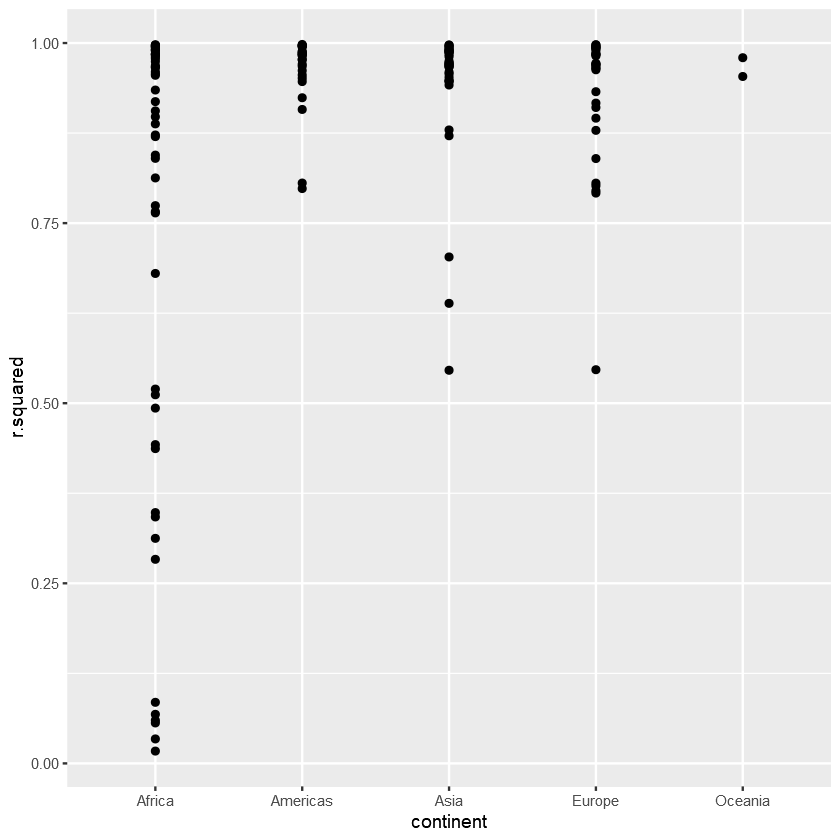

In [108]:
glance %>%
    ggplot(aes(x = continent, y = r.squared)) + geom_point()

#### R^2값이 작은 국가 데이터를 그래프로

In [109]:
bad_fit <- filter(glance, r.squared < 0.25)
bad_fit %>% print

# A tibble: 6 x 17
# Groups:   country, continent [6]
  country   continent data     model  resids   r.squared adj.r.squared sigma
  <fct>     <fct>     <list>   <list> <list>       <dbl>         <dbl> <dbl>
1 Botswana  Africa    <tibble> <lm>   <tibble>    0.0340      -0.0626   6.11
2 Lesotho   Africa    <tibble> <lm>   <tibble>    0.0849      -0.00666  5.93
3 Rwanda    Africa    <tibble> <lm>   <tibble>    0.0172      -0.0811   6.56
4 Swaziland Africa    <tibble> <lm>   <tibble>    0.0682      -0.0250   6.64
5 Zambia    Africa    <tibble> <lm>   <tibble>    0.0598      -0.0342   4.53
6 Zimbabwe  Africa    <tibble> <lm>   <tibble>    0.0562      -0.0381   7.21
# ... with 9 more variables: statistic <dbl>, p.value <dbl>, df <dbl>,
#   logLik <dbl>, AIC <dbl>, BIC <dbl>, deviance <dbl>, df.residual <int>,
#   nobs <int>


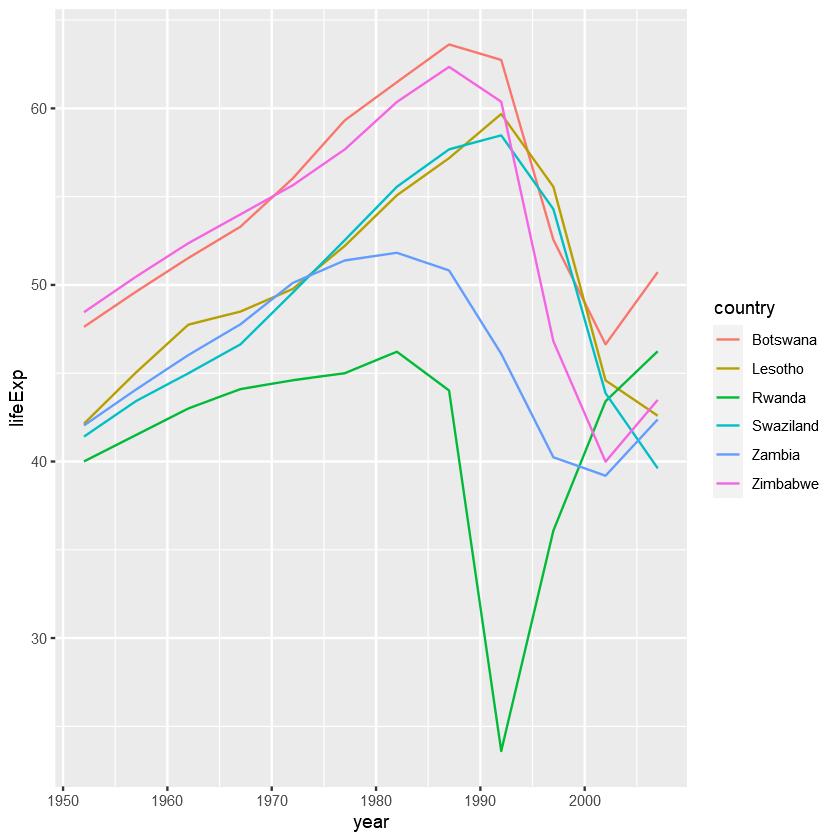

In [110]:
gapminder %>%
    semi_join(bad_fit, by = "country") %>%
    ggplot(aes(year, lifeExp, color = country)) + geom_line()

HIV/AIDS 전염병과 르완다 집단 학살의 비극이라는 두 가지 주요 효과 확인 가능

In [111]:
# 20.2.5
# 1
lifeExp ~ poly(year, 2)

lifeExp ~ poly(year, 2)

In [112]:
country_model <- function(df) {
  lm(lifeExp ~ poly(year - median(year), 2), data = df)
}

In [113]:
by_country <- gapminder %>%
  group_by(country, continent) %>%
  nest()

by_country <- by_country %>%
  mutate(model = map(data, country_model))

In [114]:
by_country <- by_country %>%
  mutate(
    resids = map2(data, model, add_residuals)
  )
by_country %>% print

# A tibble: 142 x 5
# Groups:   country, continent [142]
   country     continent data              model  resids           
   <fct>       <fct>     <list>            <list> <list>           
 1 Afghanistan Asia      <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 2 Albania     Europe    <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 3 Algeria     Africa    <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 4 Angola      Africa    <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 5 Argentina   Americas  <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 6 Australia   Oceania   <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 7 Austria     Europe    <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 8 Bahrain     Asia      <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
 9 Bangladesh  Asia      <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
10 Belgium     Europe    <tibble [12 x 4]> <lm>   <tibble [12 x 5]>
# ... with 132 more rows


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



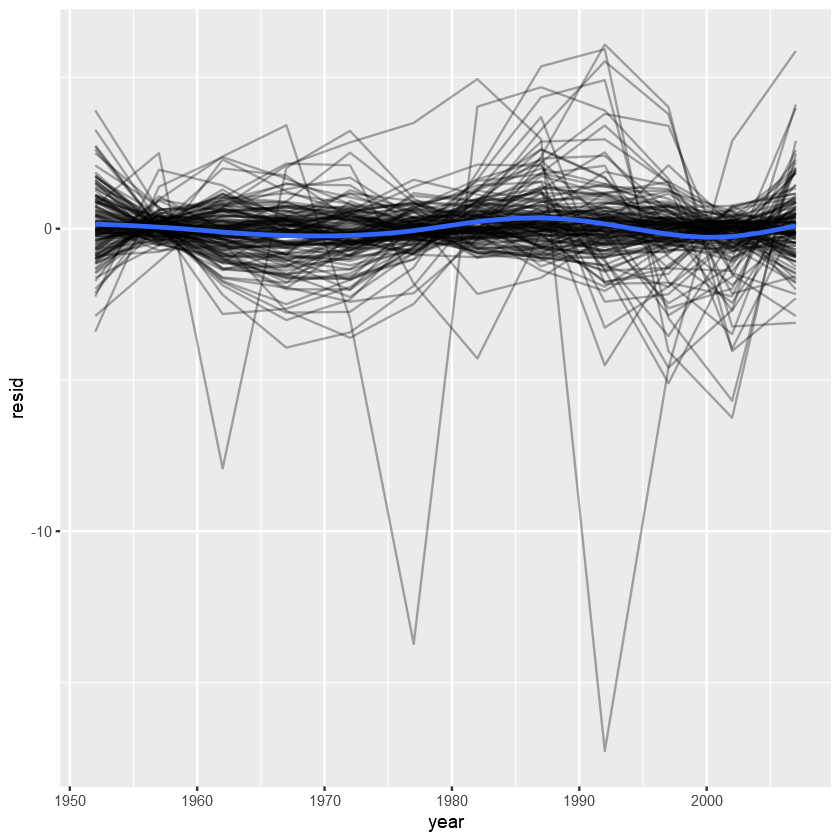

In [115]:
unnest(by_country, resids) %>%
  ggplot(aes(year, resid)) +
  geom_line(aes(group = country), alpha = 1 / 3) +
  geom_smooth(se = FALSE)

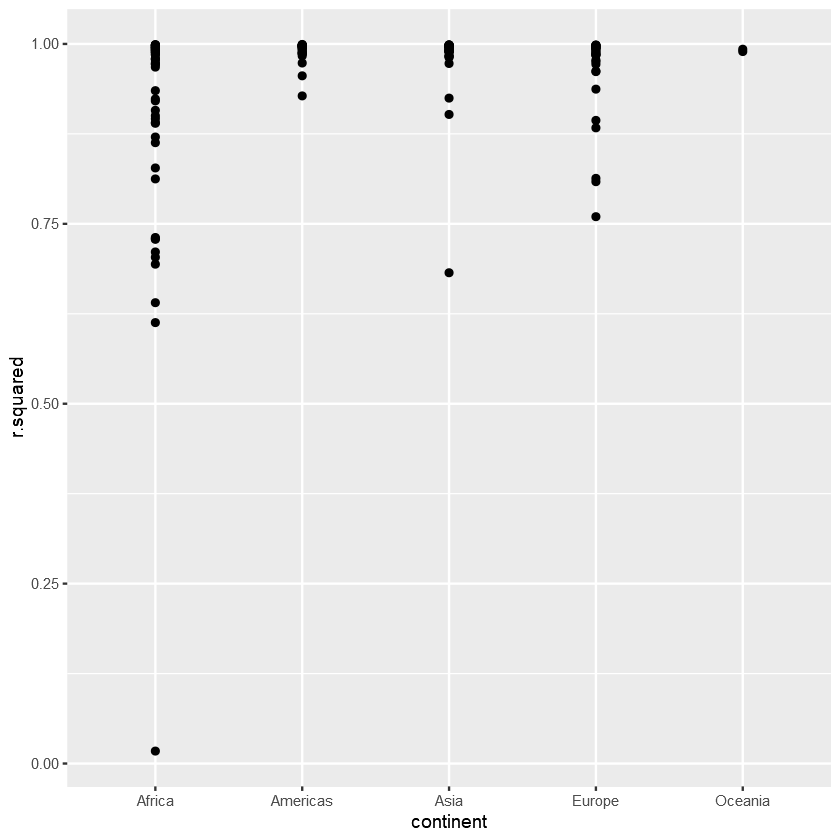

In [116]:
by_country %>%
  mutate(glance = map(model, broom::glance)) %>%
  unnest(glance, .drop = TRUE) %>%
  ggplot(aes(continent, r.squared)) +
  geom_point()

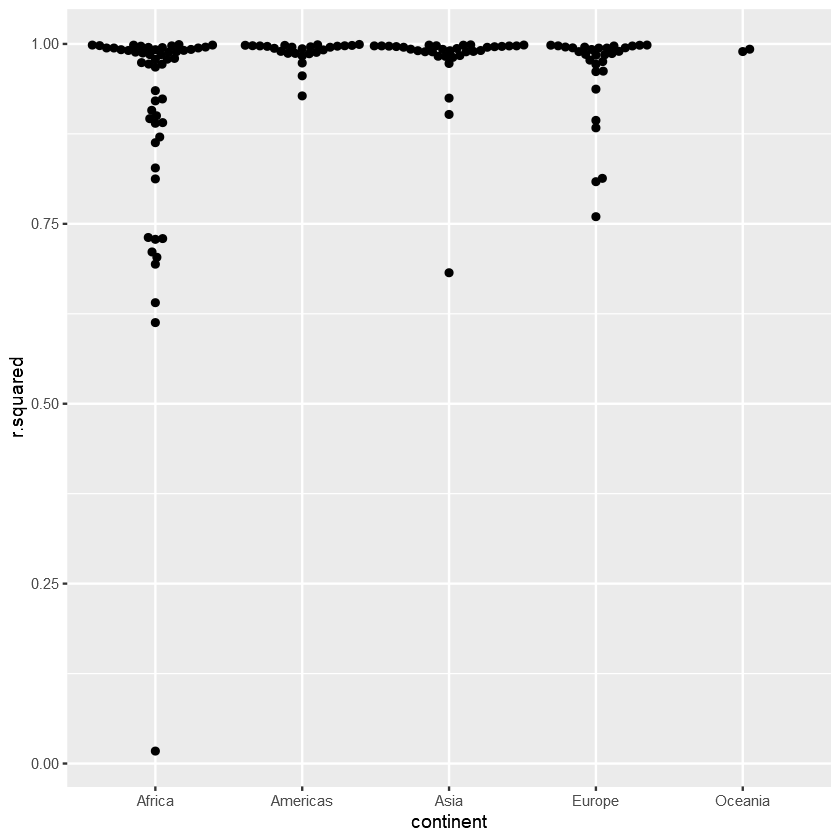

In [117]:
# 2
library("ggbeeswarm")
by_country %>%
  mutate(glance = map(model, broom::glance)) %>%
  unnest(glance, .drop = TRUE) %>%
  ggplot(aes(continent, r.squared)) +
  geom_beeswarm()

In [120]:
# 3
a <- gapminder %>%
      group_by(country, continent) %>%
      nest() %>%
      mutate(model = map(data, ~lm(lifeExp ~ year, .))) %>%
      mutate(glance = map(model, broom::glance)) %>%
      unnest(glance) %>%
      unnest(data) %>% print

# A tibble: 1,704 x 19
# Groups:   country, continent [142]
   country     continent  year lifeExp      pop gdpPercap model  r.squared
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl> <list>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779. <lm>       0.948
 2 Afghanistan Asia       1957    30.3  9240934      821. <lm>       0.948
 3 Afghanistan Asia       1962    32.0 10267083      853. <lm>       0.948
 4 Afghanistan Asia       1967    34.0 11537966      836. <lm>       0.948
 5 Afghanistan Asia       1972    36.1 13079460      740. <lm>       0.948
 6 Afghanistan Asia       1977    38.4 14880372      786. <lm>       0.948
 7 Afghanistan Asia       1982    39.9 12881816      978. <lm>       0.948
 8 Afghanistan Asia       1987    40.8 13867957      852. <lm>       0.948
 9 Afghanistan Asia       1992    41.7 16317921      649. <lm>       0.948
10 Afghanistan Asia       1997    41.8 22227415      635. <lm>       0.948
# ... with 1,694 more rows, and 11 more 

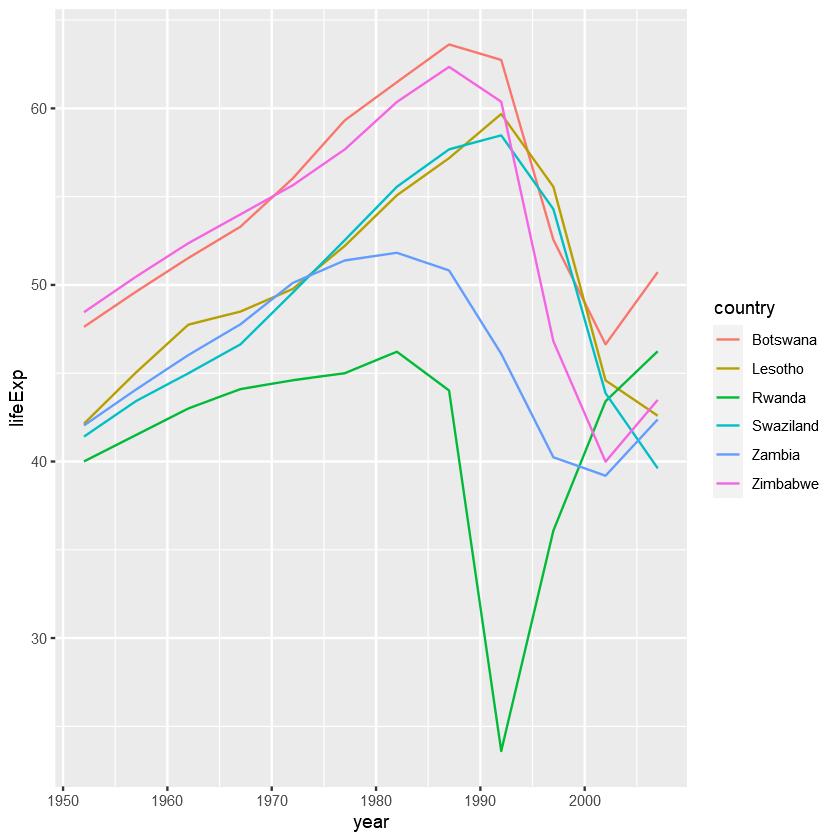

In [121]:
a %>%
    filter(r.squared < 0.25) %>%
      ggplot(aes(year, lifeExp)) +
      geom_line(aes(color = country))

### 리스트-열

In [129]:
data.frame(x = list(1:3, 3:5))

x.1.3,x.3.5
<int>,<int>
1,3
2,4
3,5


In [128]:
data.frame(
    x = I(list(1:3, 3:5)),
    y = c("1, 2", "3, 4, 5")
) 

x,y
<I<list>>,<chr>
"1, 2, 3","1, 2"
"3, 4, 5","3, 4, 5"


In [127]:
tibble(
    x = list(1:3, 3:5),
    y = c("1, 2", "3, 4, 5")
)

x,y
<list>,<chr>
"1, 2, 3","1, 2"
"3, 4, 5","3, 4, 5"


In [130]:
tribble(
    ~x, ~y,
    1:3, "1, 2",
    3:5, "3, 4, 5"
)

x,y
<list>,<chr>
"1, 2, 3","1, 2"
"3, 4, 5","3, 4, 5"


### 리스트-열 생성하기

### 중첩을 사용하여 생성

In [131]:
gapminder %>%
    group_by(country, continent) %>%
    nest() %>% print

# A tibble: 142 x 3
# Groups:   country, continent [142]
   country     continent data             
   <fct>       <fct>     <list>           
 1 Afghanistan Asia      <tibble [12 x 4]>
 2 Albania     Europe    <tibble [12 x 4]>
 3 Algeria     Africa    <tibble [12 x 4]>
 4 Angola      Africa    <tibble [12 x 4]>
 5 Argentina   Americas  <tibble [12 x 4]>
 6 Australia   Oceania   <tibble [12 x 4]>
 7 Austria     Europe    <tibble [12 x 4]>
 8 Bahrain     Asia      <tibble [12 x 4]>
 9 Bangladesh  Asia      <tibble [12 x 4]>
10 Belgium     Europe    <tibble [12 x 4]>
# ... with 132 more rows


In [133]:
gapminder %>%
    nest(year:gdpPercap) %>% print

Warning message:
"All elements of `...` must be named.
Did you want `data = year:gdpPercap`?"


# A tibble: 142 x 3
   country     continent data             
   <fct>       <fct>     <list>           
 1 Afghanistan Asia      <tibble [12 x 4]>
 2 Albania     Europe    <tibble [12 x 4]>
 3 Algeria     Africa    <tibble [12 x 4]>
 4 Angola      Africa    <tibble [12 x 4]>
 5 Argentina   Americas  <tibble [12 x 4]>
 6 Australia   Oceania   <tibble [12 x 4]>
 7 Austria     Europe    <tibble [12 x 4]>
 8 Bahrain     Asia      <tibble [12 x 4]>
 9 Bangladesh  Asia      <tibble [12 x 4]>
10 Belgium     Europe    <tibble [12 x 4]>
# ... with 132 more rows


### 벡터화 함수에서 생성

In [135]:
df <- tribble(
    ~x1, 
    "a, b, c",
    "d, e, f, g"
)

In [137]:
df %>%
    mutate(x2 = stringr::str_split(x1, ",")) %>% print

# A tibble: 2 x 2
  x1         x2       
  <chr>      <list>   
1 a, b, c    <chr [3]>
2 d, e, f, g <chr [4]>


In [138]:
df %>%
    mutate(x2 = stringr::str_split(x1, ",")) %>%
    unnest()

Warning message:
"`cols` is now required when using unnest().
Please use `cols = c(x2)`"


x1,x2
<chr>,<chr>
"a, b, c",a
"a, b, c",b
"a, b, c",c
"d, e, f, g",d
"d, e, f, g",e
"d, e, f, g",f
"d, e, f, g",g


- map(), map2(), pmap()

In [139]:
sim <- tribble(
    ~f, ~params,
    "runif", list(min = -1, max = -1),
    "rnorm", list(sd = 5),
    "rpois", list(lambda = 10)
)

In [140]:
sim %>% 
    mutate(sims = invoke_map(f, params, n = 10))

f,params,sims
<chr>,<list>,<list>
runif,"-1, -1","-1, -1, -1, -1, -1, -1, -1, -1, -1, -1"
rnorm,5,"-0.4035617, 2.8863961, -0.2646990, -0.2251960, -2.5200829, -5.1843267, -6.3733172, -7.7965963, -1.0905792, -2.8062611"
rpois,10,"15, 11, 11, 11, 12, 10, 11, 11, 11, 13"


### 다중값 요약에서 생성

In [146]:
mtcars %>%
    group_by(cyl) %>%
    summarize(q = quantile(mpg)) 

`summarise()` has grouped output by 'cyl'. You can override using the `.groups` argument.


cyl,q
<dbl>,<dbl>
4,21.40
4,22.80
4,26.00
4,30.40
4,33.90
6,17.80
6,18.65
6,19.70
6,21.00


In [145]:
mtcars %>%
    group_by(cyl) %>%
    summarize(q = list(quantile(mpg)))

cyl,q
<dbl>,<list>
4,"21.4, 22.8, 26.0, 30.4, 33.9"
6,"17.80, 18.65, 19.70, 21.00, 21.40"
8,"10.40, 14.40, 15.20, 16.25, 19.20"


In [147]:
probs <- c(0.01, 0.25, 0.5, 0.75, 0.99)
mtcars %>%
    group_by(cyl) %>%
    summarize(p = list(probs), q = list(quantile(mpg, probs))) %>%
    unnest()

Warning message:
"`cols` is now required when using unnest().
Please use `cols = c(p, q)`"


cyl,p,q
<dbl>,<dbl>,<dbl>
4,0.01,21.410
4,0.25,22.800
4,0.50,26.000
4,0.75,30.400
4,0.99,33.750
6,0.01,17.818
6,0.25,18.650
6,0.50,19.700
6,0.75,21.000


### 명명된 리스트에서 생성
- enframe() : 리스트의 내용과 요소를 유지하며 데이터프레임을 생성

In [151]:
x <- list(
    a = 1:5,
    b = 3:4,
    c = 5:6
) %>% print

$a
[1] 1 2 3 4 5

$b
[1] 3 4

$c
[1] 5 6



In [150]:
df <- enframe(x) ; df

name,value
<chr>,<list>
a,"1, 2, 3, 4, 5"
b,"3, 4"
c,"5, 6"


In [153]:
df %>% 
  mutate(
    smry = map2_chr(name, value, ~ stringr::str_c(.x, ": ", .y[1]))
  )

name,value,smry
<chr>,<list>,<chr>
a,"1, 2, 3, 4, 5",a: 1
b,"3, 4",b: 3
c,"5, 6",c: 5


In [155]:
# 20.4.5
# 1 : 원자 벡터를 입력하여 리스트를 반환하는 모든 함수
str_split(sentences[1:3], " ")
str_match_all(c("abc", "aa", "aabaa", "abbbc"), "a+") %>% print
map(1:3, runif)

[[1]]
[1] "The"     "birch"   "canoe"   "slid"    "on"      "the"     "smooth" 
[8] "planks."

[[2]]
[1] "Glue"        "the"         "sheet"       "to"          "the"        
[6] "dark"        "blue"        "background."

[[3]]
[1] "It's"  "easy"  "to"    "tell"  "the"   "depth" "of"    "a"     "well."

[[1]]
     [,1]
[1,] "a" 

[[2]]
     [,1]
[1,] "aa"

[[3]]
     [,1]
[1,] "aa"
[2,] "aa"

[[4]]
     [,1]
[1,] "a" 



[[1]]
[1] 0.4152376

[[2]]
[1] 0.6045846 0.7573552

[[3]]
[1] 0.8447277 0.4009262 0.3374891

In [160]:
# 2 : quantile()처럼 여러 개의 값을 반환하는 유용한 요약 함수
range(mtcars$mpg)
fivenum(mtcars$mpg)

[1] 10.4 33.9

[1] 10.40 15.35 19.20 22.80 33.90

In [162]:
boxplot.stats(mtcars$mpg) %>% print

$stats
[1] 10.40 15.35 19.20 22.80 33.90

$n
[1] 32

$conf
[1] 17.11916 21.28084

$out
numeric(0)



In [163]:
# 3 :
mtcars %>%
  group_by(cyl) %>%
  summarise(p = q = list(quantile(mpg))) %>%
  unnest()

Warning message:
"`cols` is now required when using unnest().
Please use `cols = c(q)`"


cyl,q
<dbl>,<dbl>
4,21.40
4,22.80
4,26.00
4,30.40
4,33.90
6,17.80
6,18.65
6,19.70
6,21.00


In [164]:
quantile(mtcars$mpg)

0%    25%    50%    75%   100% 
10.400 15.425 19.200 22.800 33.900

In [167]:
# 4
mtcars %>%
  group_by(cyl) %>%
  summarise_each(funs(list)) %>% head

cyl,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
4,"22.8, 24.4, 22.8, 32.4, 30.4, 33.9, 21.5, 27.3, 26.0, 30.4, 21.4","108.0, 146.7, 140.8, 78.7, 75.7, 71.1, 120.1, 79.0, 120.3, 95.1, 121.0","93, 62, 95, 66, 52, 65, 97, 66, 91, 113, 109","3.85, 3.69, 3.92, 4.08, 4.93, 4.22, 3.70, 4.08, 4.43, 3.77, 4.11","2.320, 3.190, 3.150, 2.200, 1.615, 1.835, 2.465, 1.935, 2.140, 1.513, 2.780","18.61, 20.00, 22.90, 19.47, 18.52, 19.90, 20.01, 18.90, 16.70, 16.90, 18.60","1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1","1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1","4, 4, 4, 4, 4, 4, 3, 4, 5, 5, 4","1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2"
6,"21.0, 21.0, 21.4, 18.1, 19.2, 17.8, 19.7","160.0, 160.0, 258.0, 225.0, 167.6, 167.6, 145.0","110, 110, 110, 105, 123, 123, 175","3.90, 3.90, 3.08, 2.76, 3.92, 3.92, 3.62","2.620, 2.875, 3.215, 3.460, 3.440, 3.440, 2.770","16.46, 17.02, 19.44, 20.22, 18.30, 18.90, 15.50","0, 0, 1, 1, 1, 1, 0","1, 1, 0, 0, 0, 0, 1","4, 4, 3, 3, 4, 4, 5","4, 4, 1, 1, 4, 4, 6"
8,"18.7, 14.3, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 15.5, 15.2, 13.3, 19.2, 15.8, 15.0","360.0, 360.0, 275.8, 275.8, 275.8, 472.0, 460.0, 440.0, 318.0, 304.0, 350.0, 400.0, 351.0, 301.0","175, 245, 180, 180, 180, 205, 215, 230, 150, 150, 245, 175, 264, 335","3.15, 3.21, 3.07, 3.07, 3.07, 2.93, 3.00, 3.23, 2.76, 3.15, 3.73, 3.08, 4.22, 3.54","3.440, 3.570, 4.070, 3.730, 3.780, 5.250, 5.424, 5.345, 3.520, 3.435, 3.840, 3.845, 3.170, 3.570","17.02, 15.84, 17.40, 17.60, 18.00, 17.98, 17.82, 17.42, 16.87, 17.30, 15.41, 17.05, 14.50, 14.60","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1","3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5","2, 4, 3, 3, 3, 4, 4, 4, 2, 2, 4, 2, 4, 8"


### 리스트-열 단순화

### 리스트를 벡터로 만들기

In [171]:
(df <- tribble(
    ~x,
    letters[1:5],
    1:3,
    runif(5)
))

x
<list>
"a, b, c, d, e"
"1, 2, 3"
"0.03470485, 0.34055941, 0.22126957, 0.93299724, 0.06819800"


In [169]:
df %>% mutate(
    type = map_chr(x, typeof),
    length = map_int(x, length)
)

x,type,length
<list>,<chr>,<int>
"a, b, c, d, e",character,5
"1, 2, 3",integer,3
"0.10101468, 0.03197189, 0.61417117, 0.24169169, 0.57967767",double,5


In [172]:
df <- tribble(
    ~x,
    list(a = 1, b = 2),
    list(a = 2, c = 4)
)
df %>% mutate(
    a = map_dbl(x, "a"),
    b = map_dbl(x, "b", .null = NA_real_)
)

x,a,b
<list>,<dbl>,<dbl>
"1, 2",1,2
"2, 4",2,NA


### 중첩 해제

In [174]:
tibble(x = 1:2, y = list(1:4, 1)) 

x,y
<int>,<list>
1,"1, 2, 3, 4"
2,1


In [175]:
tibble(x = 1:2, y = list(1:4, 1)) %>% unnest(y)

x,y
<int>,<dbl>
1,1
1,2
1,3
1,4
2,1


In [178]:
# 모든 행에 대해서 y와 z는 같은 수의 요소를 포함하므로 동작
(df1 <- tribble(
    ~x, ~y, ~z,
    1, c("a", "b"), 1:2,
    2, "c", 3
))

x,y,z
<dbl>,<list>,<list>
1,"a, b","1, 2"
2,c,3


In [181]:
df1 %>% unnest(y, z)

Warning message:
"unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(y, z))`, with `mutate()` if needed"


x,y,z
<dbl>,<chr>,<dbl>
1,a,1
1,b,2
2,c,3


In [183]:
(df2 <- tribble(
    ~x, ~y, ~z,
    1, "a", 1:2,
    2, c("b", "c"), 3
))

x,y,z
<dbl>,<list>,<list>
1,a,"1, 2"
2,"b, c",3


In [184]:
df2 %>% unnest(y, z)

Warning message:
"unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(y, z))`, with `mutate()` if needed"


x,y,z
<dbl>,<chr>,<dbl>
1,a,1
1,a,2
2,b,3
2,c,3


### broom으로 타이디 데이터 만들기


### broom::glance(model) 
- 각 모델에 대한 모델 성능 척도 메트릭을 표시

<br/>

### broom::tidy(model) 
- 모델의 각 계수에 대한 행을 반환, 각 열은 추정값 또는 변동성에 대한 정보 제공

<br/>

### broom::augment(model, data) 
- data의 각 행에 잔차와 같은 영향 통계량을 추가하여 반환